<a href="https://colab.research.google.com/github/vibhavaid/Research-project/blob/main/CNN_galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzipping the folder

In [ ]:
!unzip /content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip

Archive:  /content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip
replace all_ones_benchmark.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: all_ones_benchmark.zip  
  inflating: all_zeros_benchmark.zip  
  inflating: central_pixel_benchmark.zip  
  inflating: images_test_rev1.zip    A

  inflating: images_training_rev1.zip  A

  inflating: training_solutions_rev1.zip  


unzipping the training and testing images in the folder of galaxy zoo

In [ ]:


#unzipping the training and testing images in the folder of galaxy zoo
!unzip /content/images_training_rev1.zip
!unzip /content/training_solutions_rev1.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflating: images_training_rev1/926655.jpg  
  inflating: images_training_rev1/926657.jpg  
  inflating: images_training_rev1/926675.jpg  
  inflati

Important librabries

In [ ]:
import random
from PIL import Image
from cv2 import imread
import matplotlib.pyplot as plt
import time, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers, metrics, losses, callbacks, regularizers
from tensorflow.python.client import device_lib
#Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
import numpy as np
import pandas as pd
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.model1s import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D, LSTM, Flatten, TimeDistributed
from keras.callbacks import model1Checkpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model1_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import os

In [ ]:
set_trained  = pd.read_csv('/content/training_solutions_rev1.csv')
file_name = os.listdir('/content/images_training_rev1')

set_trained.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


Setting the base path

In [ ]:
main_path = r'/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge.zip'
train_solutions = os.path.join('/content/training_solutions_rev1.zip')
train_image= os.path.join('/content/images_test_rev1.zip')

In [ ]:
dataframe = pd.read_csv(train_solutions)
cols = dataframe.columns
new = list(map(lambda s: s.replace('Class','Q'), cols))
dataframe.columns = new
dataframe.head()


,GalaxyID,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q3.1,Q3.2,Q4.1,Q4.2,...,Q9.3,Q10.1,Q10.2,Q10.3,Q11.1,Q11.2,Q11.3,Q11.4,Q11.5,Q11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
elliptical_galaxy = dataframe[(dataframe['Q1.1']>0.7) & (dataframe['Q7.1']>0.4)]['GalaxyID'].tolist()
lenticular_galaxy = dataframe[(dataframe['Q1.1']>0.7) & (dataframe['Q7.2']>0.4)]['GalaxyID'].tolist()
spirals_galaxy = dataframe[(dataframe['Q1.2']>0.7) & (dataframe['Q2.1']>0.4)]['GalaxyID'].tolist()
print('Sum of total number of elliptical : ',  len(elliptical_galaxy))
print('Sum of total number of lenticular : ',  len(lenticular_galaxy))
print('Sum of total number of spiral: ',  len(spirals_galaxy))

Sum of total number of elliptical :  7311
Sum of total number of lenticular :  6625
Sum of total number of spiral:  4635


For copying and removal of files

In [ ]:
import shutil 

In [ ]:
def images(source, destination, label, arr, percent):
    train_directory = os.path.join(destination, 'train')
    val_directory = os.path.join(destination, 'validation')
    print(train_directory)
    
    train_destination = os.path.join(train_directory, label)
    val_destination   = os.path.join(val_directory, label)
    
    if not os.path.exists(train_destination):
        os.makedirs(train_destination)

    if not os.path.exists(val_destination):
        os.makedirs(val_destination)
    
    random.shuffle(arr)
    
    idx = int(len(arr)*percent)
    for i in arr[0:idx]:
        shutil.copyfile(os.path.join(source, str(i)+'.jpg'), os.path.join(train_destination, str(i)+'.jpg'))
    for i in arr[idx:]:
        shutil.copyfile(os.path.join(source, str(i)+'.jpg'), os.path.join(val_destination, str(i)+'.jpg'))
    
    print(label, 'done!')

In [ ]:
images('/content/images_training_rev1', '/content/galaxy-zoo-clean/data/', 'elliptical', elliptical_galaxy, 0.80)
images('/content/images_training_rev1','/content/galaxy-zoo-clean/data/', 'lenticular', lenticular_galaxy, 0.80)
images('/content/images_training_rev1', '/content/galaxy-zoo-clean/data/', 'spiral', spirals_galaxy, 0.80)


print('Elliptical:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'train', 'elliptical'))))
print('Total train lenticular:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','train','lenticular'))))
print('Total train spiral:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','train','spiral'))))


print('Total validation elliptical:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'validation', 'elliptical'))))
print('Total validation lenticular:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data', 'validation', 'lenticular'))))
print('Total validation spiral:', len(os.listdir(os.path.join('/content/galaxy-zoo-clean/data','validation', 'spiral'))))

/content/galaxy-zoo-clean/data/train
elliptical done!
/content/galaxy-zoo-clean/data/train
lenticular done!
/content/galaxy-zoo-clean/data/train
spiral done!
Elliptical: 5848
Total train lenticular: 5300
Total train spiral: 3708
Total validation elliptical: 1463
Total validation lenticular: 1325
Total validation spiral: 927


In [ ]:
import PIL
import os

Elliptical galaxy

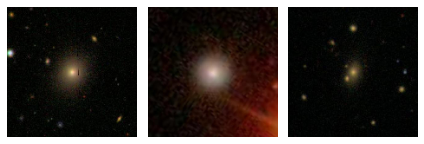

In [ ]:
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/elliptical')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'elliptical', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

# New Section

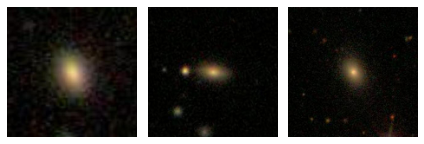

In [ ]:
# lenticular class
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/lenticular')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'lenticular', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

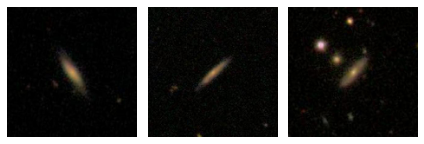

In [ ]:
# spiral class
for num, file in enumerate(os.listdir('/content/galaxy-zoo-clean/data/train/spiral')[0:3]):
    img = image.load_img(os.path.join('/content/galaxy-zoo-clean/data/', 'train', 'spiral', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
train_directory = '/content/galaxy-zoo-clean/data/train'
validation_directory= '/content/galaxy-zoo-clean/data/validation'

In [ ]:
total_train = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_train += len(os.listdir(os.path.join(train_directory, c)))
print('Total train:', total_train)

total_validation = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_validation += len(os.listdir(os.path.join(validation_directory, c)))
print('Total validation:', total_validation)

Total train: 14856
Total validation: 3715


In [ ]:
BS=32

In [ ]:
#data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=25,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2)
validation_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size=(180,180),
                                                    batch_size=BS,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_directory,
                                                         target_size=(180,180),
                                                         batch_size=BS,
                                                         shuffle=True,
                                                         class_mode='categorical')
train_steps = np.ceil(train_generator.samples / train_generator.batch_size)
val_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

Found 14856 images belonging to 3 classes.
Found 3715 images belonging to 3 classes.


In [ ]:

model = tf.keras.models.Sequential([
    # first convolution layer, input is an 150x150 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model1 = Sequential()
model1.add(Conv2D(512, (3, 3), input_shape=(180,180, 3)))
model1.add(Conv2D(256, (3, 3)))
#model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, (3, 3)))
model1.add(Conv2D(128, (3, 3)))
#model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3)))
model1.add(Conv2D(128, (3, 3)))
#model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(GlobalMaxPooling2D())


model1.add(Dropout(0.25))
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.25))
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.25))
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.25))
model1.add(Dense(37))
model1.add(Activation('sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_173 (Conv2D)         (None, 178, 178, 512)     14336     
                                                                 
 conv2d_174 (Conv2D)         (None, 176, 176, 256)     1179904   
                                                                 
 activation_103 (Activation)  (None, 176, 176, 256)    0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 88, 88, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_175 (Conv2D)         (None, 86, 86, 256)       590080    
                                                                 
 conv2d_176 (Conv2D)         (None, 84, 84, 128)       295040    
                                                      

In [ ]:
# Training
# ---------------------
num_epochs = 50
verbose = True
# Callbacks
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-5)
def decay_schedule(epoch, lr):
    return lr * 0.8 if (epoch % 10 == 0) and (epoch != 0) else lr
lr_scheduler = callbacks.LearningRateScheduler(decay_schedule)
early_stop = callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=7)
#checkpoint = callbacks.modelCheckpoint('best_model1', save_best_only=True, monitor='val_accuracy', mode='max')
callbacksInUse = []




In [ ]:
from tensorflow.keras import losses
LOSS= tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0, reduction="auto", name="categorical_crossentropy")
model.compile(loss=LOSS,
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)

In [ ]:
EPOCHS = 20

history = model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator)//BS,
                    verbose=1)

Epoch 1/20
464/464 [==============================] - 157s 332ms/step - loss: 0.8295 - accuracy: 0.5432 - val_loss: 0.5870 - val_accuracy: 0.6979
Epoch 2/20
464/464 [==============================] - 154s 332ms/step - loss: 0.5812 - accuracy: 0.7070 - val_loss: 0.5099 - val_accuracy: 0.7500
Epoch 3/20
464/464 [==============================] - 153s 330ms/step - loss: 0.4770 - accuracy: 0.7830 - val_loss: 0.4461 - val_accuracy: 0.8021
Epoch 4/20
464/464 [==============================] - 153s 330ms/step - loss: 0.4477 - accuracy: 0.7974 - val_loss: 0.3484 - val_accuracy: 0.8438
Epoch 5/20
464/464 [==============================] - 153s 330ms/step - loss: 0.4222 - accuracy: 0.8162 - val_loss: 0.3125 - val_accuracy: 0.8125
Epoch 6/20
464/464 [==============================] - 155s 333ms/step - loss: 0.4198 - accuracy: 0.8142 - val_loss: 0.3499 - val_accuracy: 0.8333
Epoch 7/20
464/464 [==============================] - 150s 324ms/step - loss: 0.4067 - accuracy: 0.8193 - val_loss: 0.4300 -

In [ ]:
from tensorflow.keras import losses
LOSS= tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0, reduction="auto", name="categorical_crossentropy")
model1.compile(loss=LOSS,
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)

In [ ]:
EPOCHS = 20

history = model1.fit(train_generator,
                    epochs=EPOCHS,                
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator)//BS,
                    verbose=1)


Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
#OPT    = tensorflow.keras.optimizers.Adam(lr=0.0001)
initial_epochs = 6
base_learning_rate = 0.0001

conv_base.compile(loss='binary_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate))


In [ ]:
mnet = inceptionv319(include_top = False, weights = "imagenet" ,input_shape=(180,180,3))

In [ ]:
from tensorflow.keras.model1s import Sequential

In [ ]:
tf.keras.backend.clear_session()
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.model1s import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D, LSTM, Flatten, TimeDistributed
model1 = keras.Sequential([mnet,
        GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation = "relu"),
        BatchNormalization(),
        Dropout(0.3),
        tf.keras.layers.Dense(128, activation = "relu"),
        Dropout(0.1),

                    # Dense(32, activation = "relu"),

                    # Dropout(0.3),
      tf.keras.layers.Dense(2, activation = "sigmoid")])
from tensorflow.keras import losses
LOSS= tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0, reduction="auto", name="categorical_crossentropy")
model1.compile(loss=LOSS,
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)
model1.summary()

In [ ]:
base_model1 = inceptionv319(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

In [ ]:
base_model1.trainable = False

base_model1.summary()

In [ ]:

inceptionv3_model1.summary()


In [ ]:
from tensorflow.keras import losses
LOSS= tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0, reduction="auto", name="categorical_crossentropy")
inceptionv3_model1.compile(loss=LOSS,
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)

In [ ]:
model1_history=inceptionv3_model1.fit(train_generator,
                        validation_data=validation_generator,
                        epochs = 20)

In [ ]:
acc = history.history['accuracy']
val_acc = mory.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

recall=model_history.history['recall']
val_recall=model_history.history['val_recall']

precision=model_history.history['precision']
val_precision=model_history.history['val_precision']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')


plt.show()


NameError: ignored

In [ ]:
recall=model1_history.history['recall']
val_recall=model1_history.history['val_recall']

precision=model1_history.history['precision']
val_precision=model1_history.history['val_precision']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, recall, label='Training Recall')
plt.plot(epochs_range, val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, precision, label='Training Precision')
plt.plot(epochs_range, val_precision, label='Validation Precision')
plt.legend(loc='upper right')
plt.title('Training and Validation Precision')
plt.savefig('./plots-v2.png')


plt.show()


